In [41]:
#coding: utf-8
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
%matplotlib inline

In [47]:
#Input parameters

Ks = 3.0 #Kg/m3
Pmax = 92.0 #Kg/m3
Ki = 27.0 #Kg/m3
mu_max = 0.0001388 #s-1 
y_n = 5.3
Yx_s = 0.026
Yp_s = 0.426
V = 800.0 #m3
F = 0.0444 #m3/s 
Cso = 115.0 #kg/m3
Cpo = 0.0
Cxo = 13.0
t = np.linspace(0, 30000, 1000)

In [48]:
# The model differential equations.
def deriv(y, t,Ks, Pmax, Ki, mu_max, y_n, Yx_s, Yp_s, V, F ):
    Cs, Cp, Cx = y
    
    dCsdt = ((F/V)*(Cso - Cs)) - (((Cx*mu_max)*(Cs/(Cs+Ks+((Cs**2)/Ki))))* (1-((Cp/Pmax)**y_n)*(1/Yx_s)))
    
    dCpdt = ((F/V)*(Cpo - Cp)) - (((Cx*mu_max)*(Cs/(Cs+Ks+((Cs**2)/Ki))))* (1-((Cp/Pmax)**y_n)*(Yp_s/Yx_s)))
        
    dCxdt = ((F/V)*(Cxo - Cx)) - (((Cx*mu_max)*(Cs/(Cs+Ks+((Cs**2)/Ki))))* (1-((Cp/Pmax)**y_n)))
    
    return dCsdt, dCpdt, dCxdt


In [49]:
# Initial conditions vector
y0 = Cso, Cpo, Cxo
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(Ks, Pmax, Ki, mu_max, y_n, Yx_s, Yp_s, V, F))
Cs, Cp, Cx = ret.T

/home/mone/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
/home/mone/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys
/home/mone/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


In [53]:
print (Cp)

[ 0. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

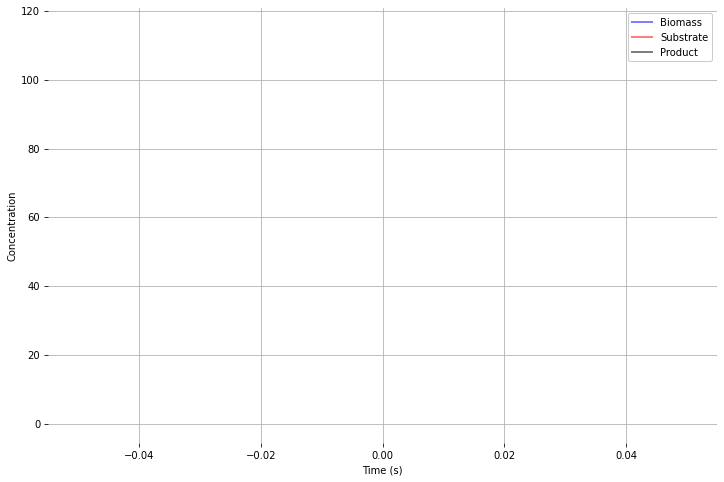

In [51]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w', figsize=(12,8))
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, Cs, 'b', alpha=0.5, lw=2, label='Biomass')
ax.plot(t, Cp, 'r', alpha=0.5, lw=2, label='Substrate')
ax.plot(t, Cx, 'k', alpha=0.5, lw=2, label='Product')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Concentration')
ax.yaxis.set_tick_params(length=4)
ax.xaxis.set_tick_params(length=4)
ax.grid(True)
legend = ax.legend()
legend.get_frame().set_alpha(1)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()